## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [700]:
import copy

import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [720]:
# your code here
data = pd.read_csv(
    "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
display(data.head(), data.shape, data.tail())


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


(1000, 21)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [702]:
data.isna().sum().sum()  #пропусков нет

0

In [703]:
#Количественные - duration; amount; age,
#Бинарные - people_liable; telephone; foreign_worker;
#Порядковые - status; savings; employment_duration; present_residence; number_credits; job
#Категориальные - credit_history; purpose; personal_status_sex; other_debtors; property; other_installment_plans; housing; installment_rate;

Status/savings отнес к порядковым, потому что считаю, что человек с большими накоплениями/зп стоит выше человека без накоплений вообще. Employment_duration - человек с большим количеством лет скорее всего не останется без работы и будет способен выплатить кредит.  Present_residence - чем больше человек живет в стране, тем больше шансов, что он отдаст кредит и не уедет его не возвратив. Number_credits - чем больше кредитов - тем хуже (для человека). Job - ясно, что лучше дать кредит профессионалу, чем человеку вовсе без работы.
Installment_rate - категориальный, непонятно, что лучше - отдавать кредит быстро или медленно. Быстро - скорее без рисков банку, потому что человек может позволить, но медленно - больше денег банку.
Credit_history отнес к категориальным, потому что непонятно, что лучше - отдать маленький кредит вовремя или сейчас отдавать огромный кредит вовремя.
Credit_risk - целевая переменная.

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [704]:
data.groupby('purpose').mean()['amount']

C:\Users\meto\AppData\Local\Temp\ipykernel_24300\215534455.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('purpose').mean()['amount']


purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [705]:
#среди человек меньше 30/ больше 40
display(data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[(data['age'] < 30)].shape[0] * 100,
        data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[(data['age'] > 40)].shape[0] * 100)
print('-' * 10)
#среди всех
display(data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data.shape[0] * 100,
        data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data.shape[0] * 100)

66.66666666666666

68.01470588235294

----------


24.6

18.5

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [706]:
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>=6'))].shape[
    0]

1

### Задание 6 (1 балл)

In [707]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

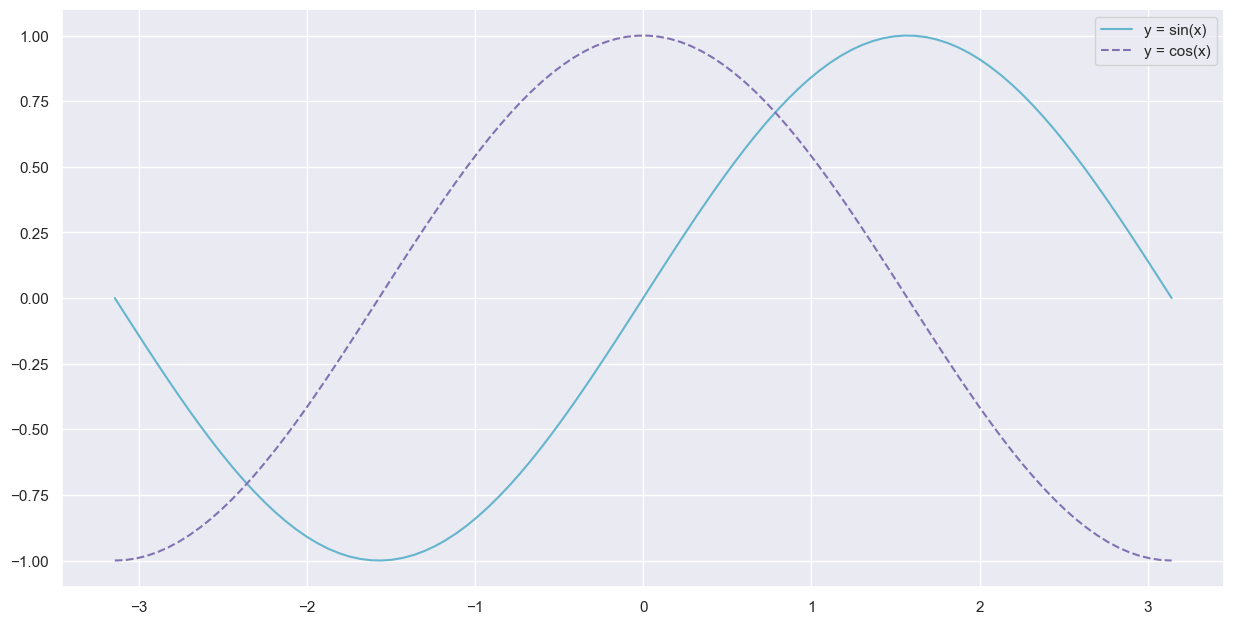

In [708]:
points = np.linspace(-np.pi, np.pi, 100)
plt.plot(points, np.sin(points), 'c')
plt.plot(points, np.cos(points), 'm--')
plt.grid(True)
plt.legend(['y = sin(x)', 'y = cos(x)'])

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

Text(0.5, 1.0, 'Bad risk')

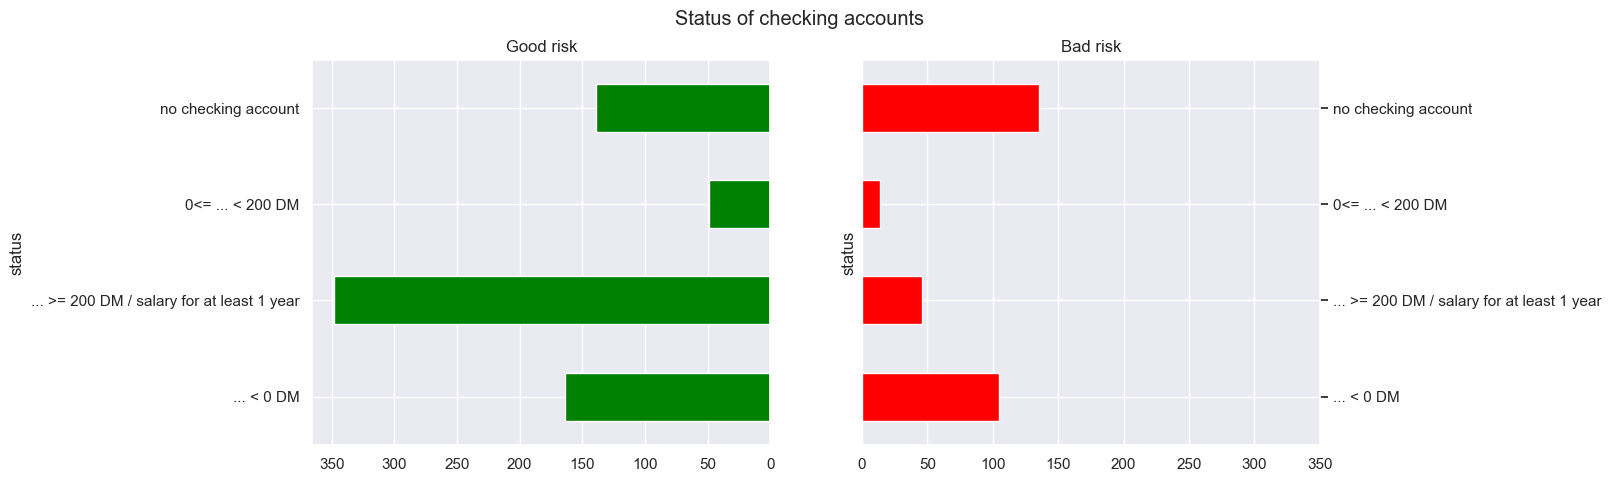

In [709]:
plt.figure(figsize=(13, 5), dpi=100)
plt.suptitle('Status of checking accounts')
plt.subplot(1, 2, 1)
data[data['credit_risk'] == 'good'].groupby('status')['credit_risk'].count().plot(kind='barh', color='green')
plt.gca().invert_xaxis()
plt.title('Good risk')

plt.subplot(1, 2, 2)
data[data['credit_risk'] == 'bad'].groupby('status')['credit_risk'].count().plot(kind='barh', color='red')
plt.gca().set_xlim([0, 350])
plt.gca().yaxis.tick_right()
plt.title('Bad risk')
#data.groupby('status')[data['credit_risk'] == 'good'].count().plot(kind = 'barh')

### Задание 8  (0.5 балла)

In [710]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<Axes: xlabel='savings', ylabel='count'>

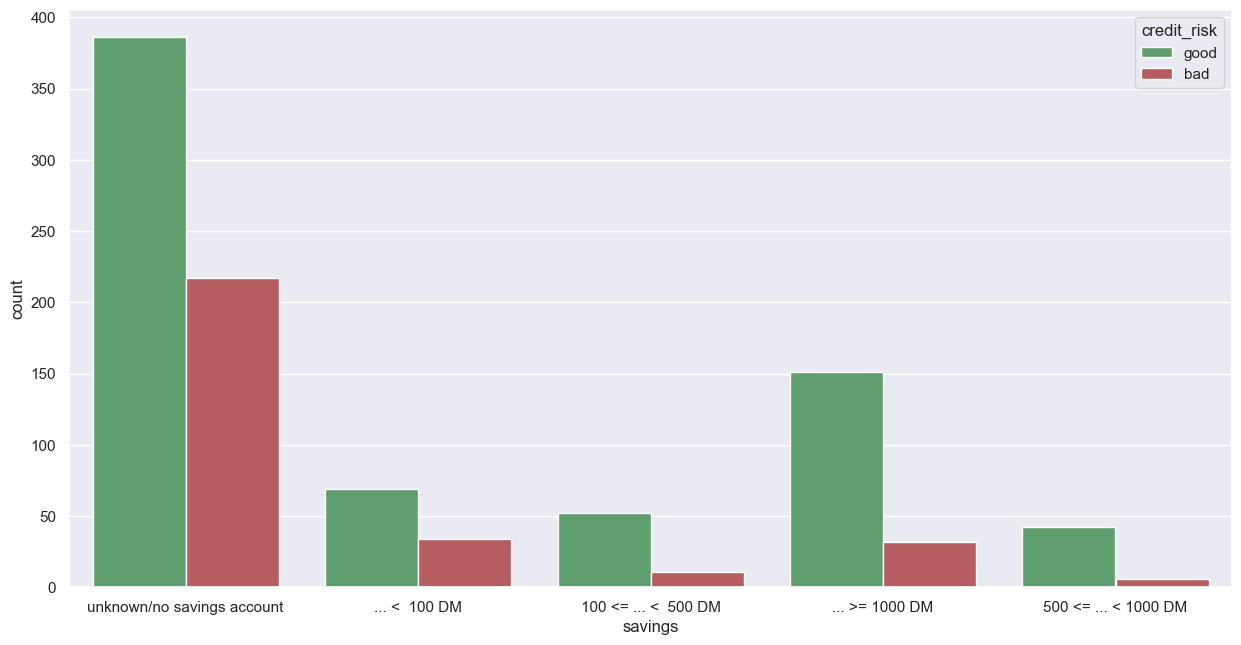

In [711]:
sns.countplot(data, x='savings', hue='credit_risk', palette={'good': 'g', 'bad': 'r'})
# с точки зрения трудоемкости и восприятия - все намного проще и лучше, чем в матплот

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

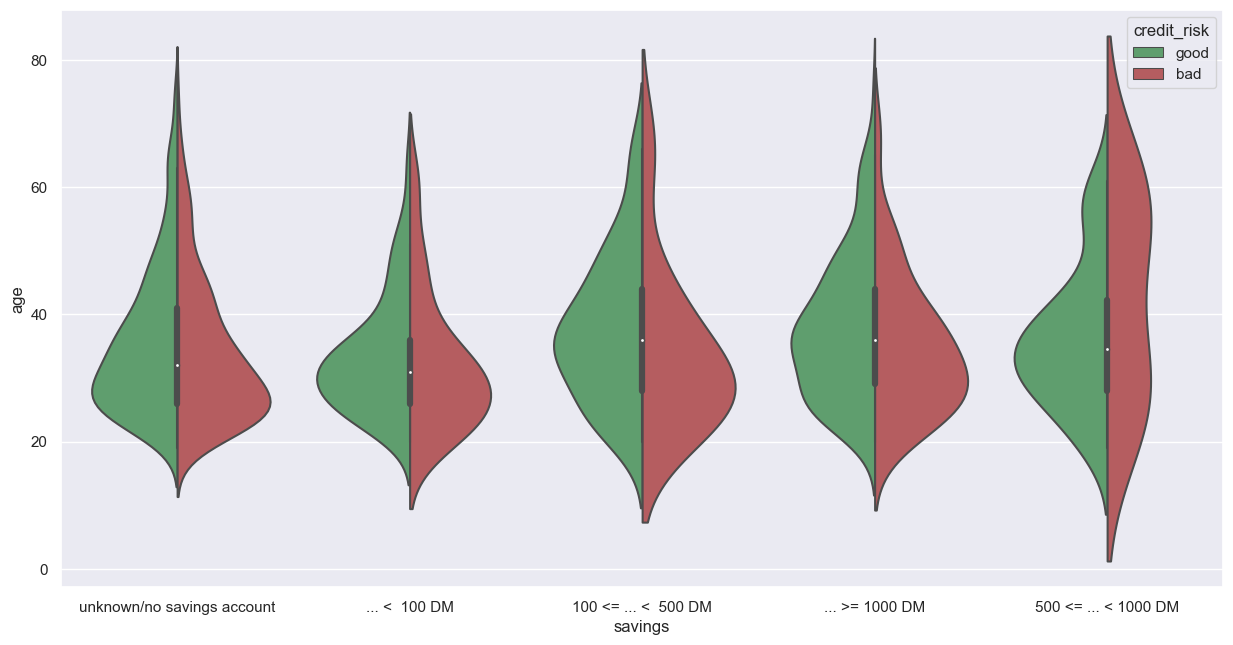

In [712]:
sns.violinplot(data, x='savings', y='age', hue='credit_risk', split=True, palette={'good': 'g', 'bad': 'r'})
sns.set(rc={'figure.figsize': (15, 7.5)})

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

[Text(0.5, 0, '')]

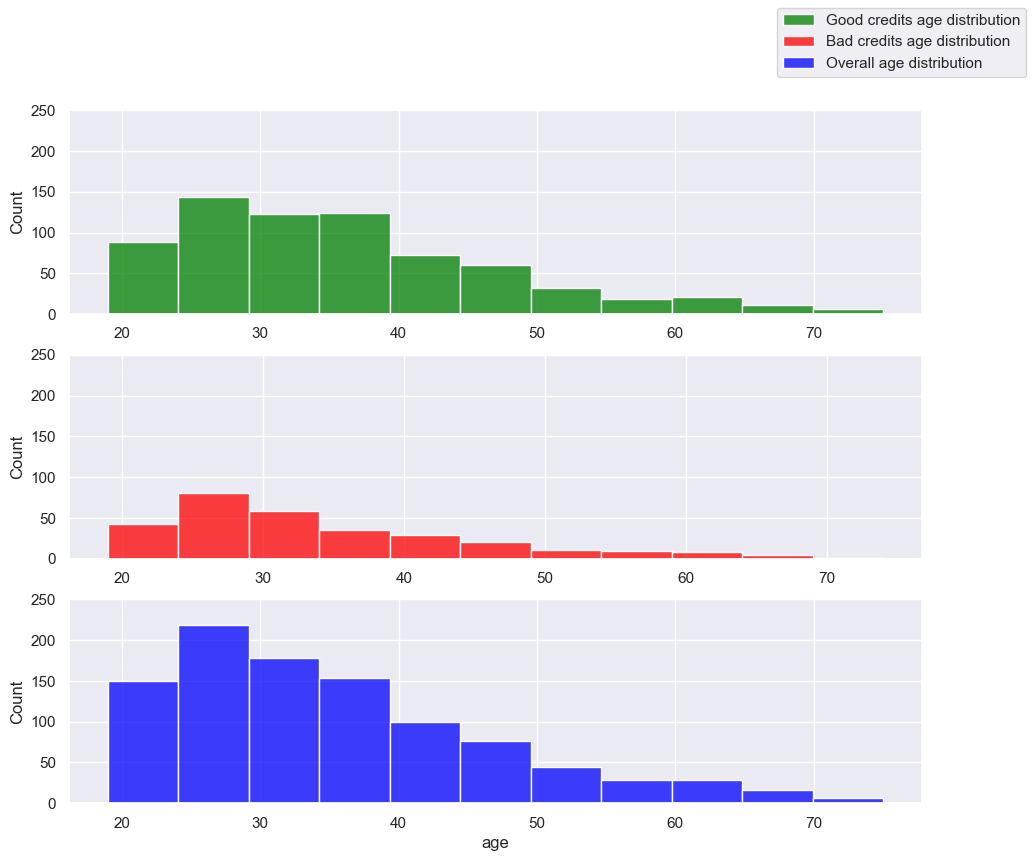

In [713]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharey='all', figsize=(11, 9))
p1 = sns.histplot(data[data['credit_risk'] == 'good'], x='age', color='green', label='Good credits age distribution',
                  ax=axs[0], bins=11)
p2 = sns.histplot(data[data['credit_risk'] == 'bad'], x='age', color='red', label='Bad credits age distribution',
                  ax=axs[1], bins=11)
sns.histplot(data, x='age', color='blue', label='Overall age distribution', ax=axs[2], bins=11)
fig.legend(loc='upper right')
plt.ylim(0, 250)
p1.set(xlabel='')
p2.set(xlabel='')

|### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<Axes: xlabel='amount', ylabel='duration'>

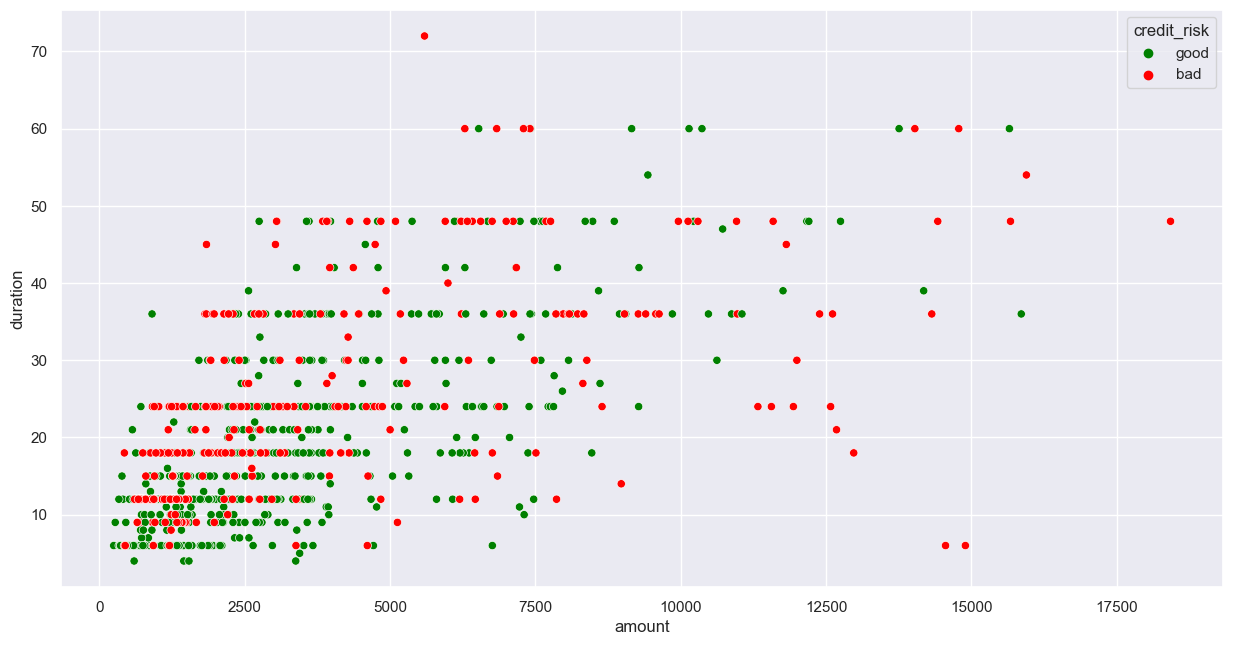

In [714]:
sns.scatterplot(data, x='amount', y='duration', palette={'good': 'green', 'bad': 'red'}, hue='credit_risk')

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

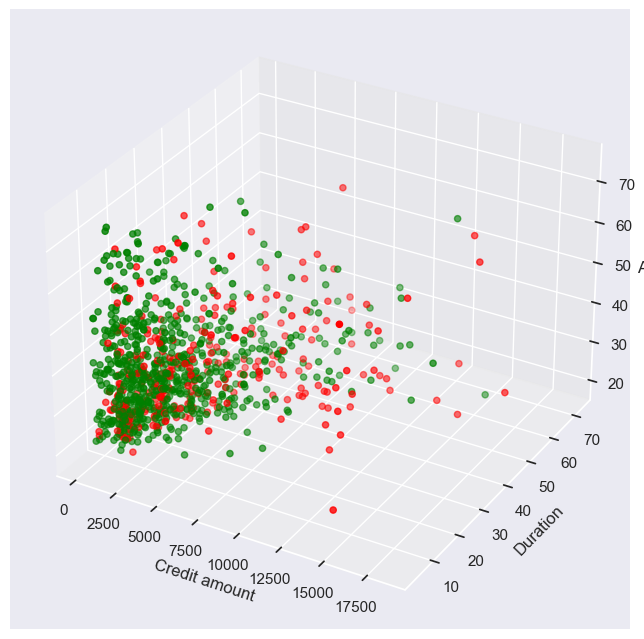

In [715]:
plt.figure(figsize=(8, 10))
ax = plt.axes(projection='3d')
color = []
d = (data['credit_risk'].to_numpy()).tolist()
for i in d:
    if i == 'bad':
        color.append('red')
    else:
        color.append('green')
ax.scatter3D(data[['amount']], data[['duration']], data[['age']], c=color)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
sns.set_style('darkgrid')

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [721]:
data = data.drop(
    columns=['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
             'housing', 'installment_rate'])
data['people_liable'] = data['people_liable'].replace(['3 or more', '0 to 2'], [0, 1])
data['telephone'] = data['telephone'].replace(['no', 'yes (under customer name)'], [0, 1])
data['foreign_worker'] = data['foreign_worker'].replace(['no', 'yes'], [0, 1])
data['status'] = data['status'].replace(
    ['... < 0 DM', 'no checking account', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year'],
    np.arange(0, 4))
data['savings'] = data['savings'].replace(
    ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM'],
    np.arange(0, 5))
data['employment_duration'] = data['employment_duration'].replace(
    ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], np.arange(0, 5))
data['present_residence'] = data['present_residence'].replace(
    ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], np.arange(0, 4))
data['number_credits'] = data['number_credits'].replace(['1', '2-3', '4-5', '>= 6'], np.arange(0, 4))
data['job'] = data['job'].replace(
    ['unemployed/unskilled - non-resident', 'unskilled - resident', 'skilled employee/official',
     'manager/self-empl./highly qualif. employee'], np.arange(0, 4))
data['credit_risk'] = data['credit_risk'].replace(['bad', 'good'], [0, 1])

data

,status,duration,amount,savings,employment_duration,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,1049,0,1,3,21,0,2,1,0,0,1
1,1,9,2799,0,2,1,36,1,2,0,0,0,1
2,0,12,841,1,3,3,23,0,1,1,0,0,1
3,1,12,2122,0,2,1,39,1,1,0,0,1,1
4,1,12,2171,0,2,3,38,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,1987,0,2,3,21,0,1,0,0,0,0
996,1,24,2303,0,4,0,45,0,2,1,0,0,0
997,3,21,12680,4,4,3,30,0,3,1,1,0,0
998,0,12,6468,4,0,0,52,0,3,1,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [812]:
def predict(Xtest: np.array, f, s) -> np.array:
    ans = []
    for i in range(len(Xtest)):
        if abs(sum(Xtest[i]) - f) < abs(sum(Xtest[i]) - s):
            ans.append(0)
        else:
            ans.append(1)
    print(sum(ans))
    return np.array(ans)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
norm = scaler.fit_transform(X_train)
mean_bad, mean_good, cnt_bad, cnt_good = 0, 0, 0, 0
for i in range(len(norm)):
    if y_train[i] == 0:
        mean_bad += sum(norm[i])
        mean_bad -= norm[i][3] * 2 + norm[i][1] * 2
        #mean_bad +=  norm[i][0]
        cnt_bad += 1
    else:
        mean_good += sum(norm[i])
        mean_good -= norm[i][3] * 2 + norm[i][1] * 2
        #mean_good +=  norm[i][0]
        cnt_good += 1
mean_bad /= cnt_bad
mean_good /= cnt_good
print(mean_bad, mean_good)
X_test = scaler.fit_transform(X_test)

accuracy_score(y_test, predict(X_test, mean_bad, mean_good))

3.5729750330531487 3.860728464451193
191


C:\Users\meto\AppData\Local\Temp\ipykernel_24300\409270161.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.648